# Strategy on SP500

In [1]:
from Utils import Strategy, Analytics
from IPython.display import Markdown, display
import copy

In [2]:
start_date = '2010-01-01'
end_date = '2024-01-01'
portfolio_value = 1000000
index = 'SP500'

In [3]:
filters = ['annual_3_tier_filter', 'biannual_2_tier_filter', 'biannual_3_tier_filter','monthly_filter', 'quarterly_filter', 'annual_filter']
filter_paths = ['filters/' + path +'.txt' for path in filters]
monthly_filter_ids = [0, 2, 3, 4, 5]
quarterly_filter_ids = [0, 1, 4, 5]
monthly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'M', risk_free_rate = 0.02, trading_fees = 0.25)
quarterly_strategy = Strategy(portfolio_value, index, start_date, end_date, resampling = 'Q', risk_free_rate = 0.02, trading_fees = 0.25)

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2024-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [4]:
monthly_rebalanced_strategies = [copy.deepcopy(monthly_strategy) for i in monthly_filter_ids]
quarterly_rebalanced_strategies = [copy.deepcopy(quarterly_strategy) for i in quarterly_filter_ids]

In [5]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    strategy.initialise(filter_paths[monthly_filter_ids[i]])
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    strategy.initialise(filter_paths[quarterly_filter_ids[i]])

In [6]:
for i, strategy in enumerate(monthly_rebalanced_strategies):
    print(strategy.filter_dict)
for i, strategy in enumerate(quarterly_rebalanced_strategies):
    print(strategy.filter_dict)

{12: 50, 6: 30, 3: 10}
{6: 50, 3: 30, 1: 10}
{1: 10}
{3: 10}
{12: 10}
{12: 50, 6: 30, 3: 10}
{6: 50, 3: 10}
{3: 10}
{12: 10}


In [7]:
def printmd(string):
    display(Markdown(string))

def display_strategy_metrics(strategy_list,filter_ids):
    for i,an in enumerate(strategy_list):
        printmd('***')
        printmd('## ' + filters[filter_ids[i]])
        printmd('***')
        printmd('### Strategy Comparison')
        an.plot_strategy_comparison()
        printmd('### Overall Metrics')
        an.get_financial_metrics(print = True)
        printmd('### Yearly Metrics')
        _,_ = an.yearly_metrics(print=True, plot=True)

## Selecting Top Stocks

In [8]:
monthly_rebalanced_analytics = [Analytics(strategy) for strategy in monthly_rebalanced_strategies]
quarterly_rebalanced_analytics = [Analytics(strategy) for strategy in quarterly_rebalanced_strategies]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Monthly Rebalanced Strategies

***

## annual_3_tier_filter

***

### Strategy Comparison

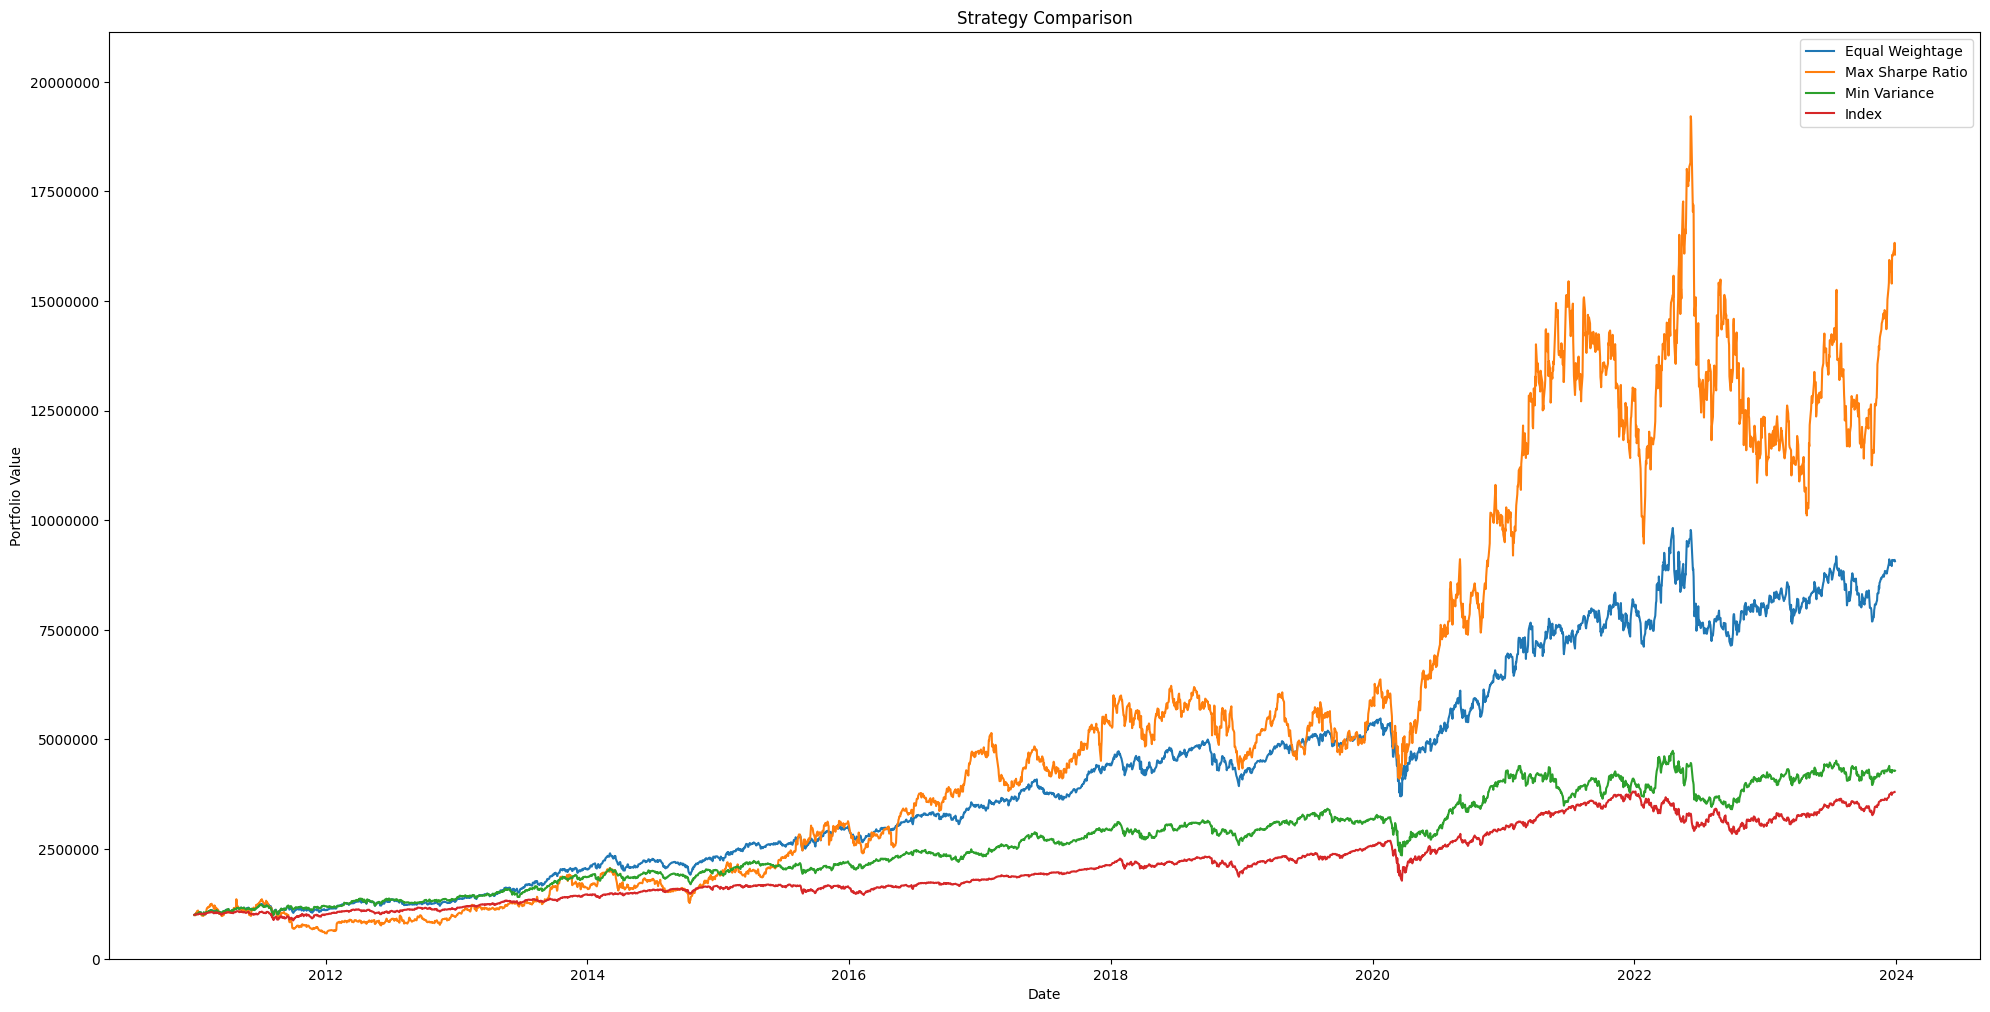

### Overall Metrics

,Equal Weightage,Max Sharpe Ratio,Min Variance,Index
Annualized Return,1851.68%,2464.38%,1187.26%,1084.36%
Max Drawdown,-3243.62%,-5751.65%,-3114.28%,-3392.50%
Volatility,2256.05%,4212.15%,2036.53%,1747.68%
Sharpe Ratio,0.732114,0.537584,0.484777,0.506023
Sortino Ratio,0.961330,0.777248,0.655385,0.618361
Calmar Ratio,0.570869,0.428466,0.381232,0.319636
VaR,8138.99%,6220.63%,7991.25%,8284.76%
CVaR,7405.22%,5242.60%,7335.58%,7662.99%


### Yearly Metrics

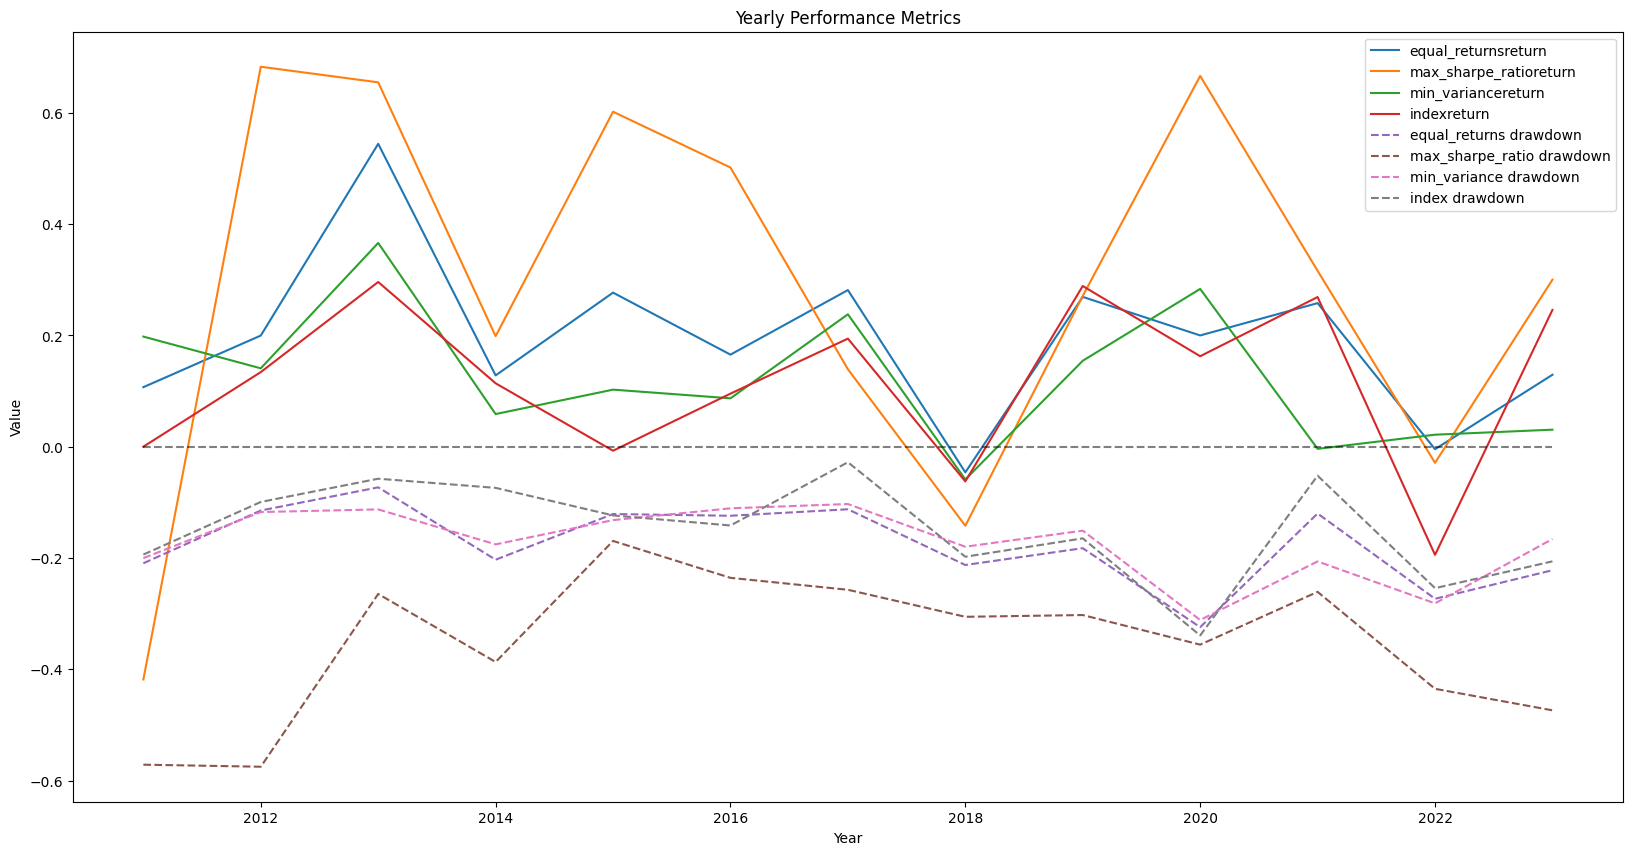

TypeError: 'bool' object is not callable

In [9]:
display_strategy_metrics(monthly_rebalanced_analytics,monthly_filter_ids)

### Quarterly Rebalanced Strategies

In [ ]:
display_strategy_metrics(quarterly_rebalanced_analytics,quarterly_filter_ids)

## Selecting 90th percentile stocks

In [ ]:
for strategy in monthly_rebalanced_strategies:
    strategy.set_percentile(0.9)
for strategy in quarterly_rebalanced_strategies:
    strategy.set_percentile(0.9)

In [ ]:
monthly_rebalanced_analytics = [Analytics(strategy) for strategy in monthly_rebalanced_strategies]
quarterly_rebalanced_analytics = [Analytics(strategy) for strategy in quarterly_rebalanced_strategies]

### Monthly Rebalanced Strategies

In [ ]:
display_strategy_metrics(monthly_rebalanced_analytics,monthly_filter_ids)

### Quarterly Rebalanced Strategies

In [ ]:
display_strategy_metrics(quarterly_rebalanced_analytics,quarterly_filter_ids)

## Selecting 80th percentile stocks

In [ ]:
for strategy in monthly_rebalanced_strategies:
    strategy.set_percentile(0.8)
for strategy in quarterly_rebalanced_strategies:
    strategy.set_percentile(0.8)

In [ ]:
monthly_rebalanced_analytics = [Analytics(strategy) for strategy in monthly_rebalanced_strategies]
quarterly_rebalanced_analytics = [Analytics(strategy) for strategy in quarterly_rebalanced_strategies]

### Monthly Rebalanced Strategies

In [ ]:
display_strategy_metrics(monthly_rebalanced_analytics,monthly_filter_ids)

### Quarterly Rebalanced Strategies

In [ ]:
display_strategy_metrics(quarterly_rebalanced_analytics,quarterly_filter_ids)